In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('Ligue1-s2122.csv')

# Data cleansing and creation of new features

In [87]:
df.head()

,№,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
0,1,Paris Saint Germain,38,26,8,4,90,36,86,82.34-7.66,38.00+2.00,80.39-5.61
1,2,Marseille,38,21,8,9,63,38,71,59.87-3.13,42.79+4.79,63.17-7.83
2,3,Monaco,38,20,9,9,65,40,69,63.58-1.42,42.51+2.51,66.01-2.99
3,4,Nice,38,20,7,11,52,36,67,59.60+7.60,44.95+8.95,61.81-5.19
4,5,Rennes,38,20,6,12,82,40,66,68.24-13.76,43.77+3.77,64.67-1.33


In [88]:
df.tail()

,№,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
15,16,Lorient,38,8,12,18,35,63,36,39.32+4.32,54.50-8.50,40.73+4.73
16,17,Clermont Foot,38,9,9,20,38,69,36,42.07+4.07,55.85-13.15,43.38+7.38
17,18,Saint-Etienne,38,7,11,20,42,77,32,40.18-1.82,64.76-12.24,39.69+7.69
18,19,Metz,38,6,13,19,35,69,31,30.15-4.85,71.65+2.65,26.71-4.29
19,20,Bordeaux,38,6,13,19,52,91,31,46.28-5.72,69.82-21.18,38.21+7.21


In [89]:
df.rename(columns={ df.columns[0]: "Ranking" }, inplace = True)

In [90]:
df['xG'] = df['xG'].str[:5]   
df['xGA'] = df['xGA'].str[:5]
df['xPTS'] = df['xPTS'].str[:5]

In [91]:
df.head(20)


,Ranking,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
0,1,Paris Saint Germain,38,26,8,4,90,36,86,82.34,38.00,80.39
1,2,Marseille,38,21,8,9,63,38,71,59.87,42.79,63.17
2,3,Monaco,38,20,9,9,65,40,69,63.58,42.51,66.01
3,4,Nice,38,20,7,11,52,36,67,59.60,44.95,61.81
4,5,Rennes,38,20,6,12,82,40,66,68.24,43.77,64.67
5,6,Strasbourg,38,17,12,9,60,43,63,61.20,44.68,63.49
6,7,Lyon,38,17,11,10,66,51,62,73.32,54.69,64.94
7,8,Lens,38,17,11,10,62,48,62,52.24,43.70,57.50
8,9,Nantes,38,15,10,13,55,48,55,45.77,53.53,45.49
9,10,Lille,38,14,13,11,48,48,55,56.39,36.97,66.82


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ranking  20 non-null     int64 
 1   Team     20 non-null     object
 2   M        20 non-null     int64 
 3   W        20 non-null     int64 
 4   D        20 non-null     int64 
 5   L        20 non-null     int64 
 6   G        20 non-null     int64 
 7   GA       20 non-null     int64 
 8   PTS      20 non-null     int64 
 9   xG       20 non-null     object
 10  xGA      20 non-null     object
 11  xPTS     20 non-null     object
dtypes: int64(8), object(4)
memory usage: 2.0+ KB


In [93]:
#change type of columns xG, xGA, xPTS to float
df['xG'] = pd.to_numeric(df['xG'])
df['xGA'] = pd.to_numeric(df['xGA'])
df['xPTS'] = pd.to_numeric(df['xPTS'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ranking  20 non-null     int64  
 1   Team     20 non-null     object 
 2   M        20 non-null     int64  
 3   W        20 non-null     int64  
 4   D        20 non-null     int64  
 5   L        20 non-null     int64  
 6   G        20 non-null     int64  
 7   GA       20 non-null     int64  
 8   PTS      20 non-null     int64  
 9   xG       20 non-null     float64
 10  xGA      20 non-null     float64
 11  xPTS     20 non-null     float64
dtypes: float64(3), int64(8), object(1)
memory usage: 2.0+ KB


In [110]:
df.head(20)

,Ranking,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,xG_diff,xGA_diff,xPTS_diff
0,1,Paris Saint Germain,38,26,8,4,90,36,86,82.34,38.00,80.39,7.66,-2.00,5.61
1,2,Marseille,38,21,8,9,63,38,71,59.87,42.79,63.17,3.13,-4.79,7.83
2,3,Monaco,38,20,9,9,65,40,69,63.58,42.51,66.01,1.42,-2.51,2.99
3,4,Nice,38,20,7,11,52,36,67,59.60,44.95,61.81,-7.60,-8.95,5.19
4,5,Rennes,38,20,6,12,82,40,66,68.24,43.77,64.67,13.76,-3.77,1.33
5,6,Strasbourg,38,17,12,9,60,43,63,61.20,44.68,63.49,-1.20,-1.68,-0.49
6,7,Lyon,38,17,11,10,66,51,62,73.32,54.69,64.94,-7.32,-3.69,-2.94
7,8,Lens,38,17,11,10,62,48,62,52.24,43.70,57.50,9.76,4.30,4.50
8,9,Nantes,38,15,10,13,55,48,55,45.77,53.53,45.49,9.23,-5.53,9.51
9,10,Lille,38,14,13,11,48,48,55,56.39,36.97,66.82,-8.39,11.03,-11.82


We are going to create the following columns:

- **xG_diff**: the difference between actual and expected goals a team scored. That way we can see which team score more or less goals than the expected.


- **xGA_diff**: the difference between actual and expected goals a team conceded. That way we will know if a team conceded more or less goals than the expected.


- **xPTS_diff**: the difference between actual and expected points a team earned. That way we will know if a team earned more or less point than the expected.

In [95]:
df['xG_diff'] = df['G'] - df['xG']
df['xGA_diff'] = df['GA'] - df['xGA']
df['xPTS_diff'] = df['PTS'] - df['xPTS']

# Data Visualization

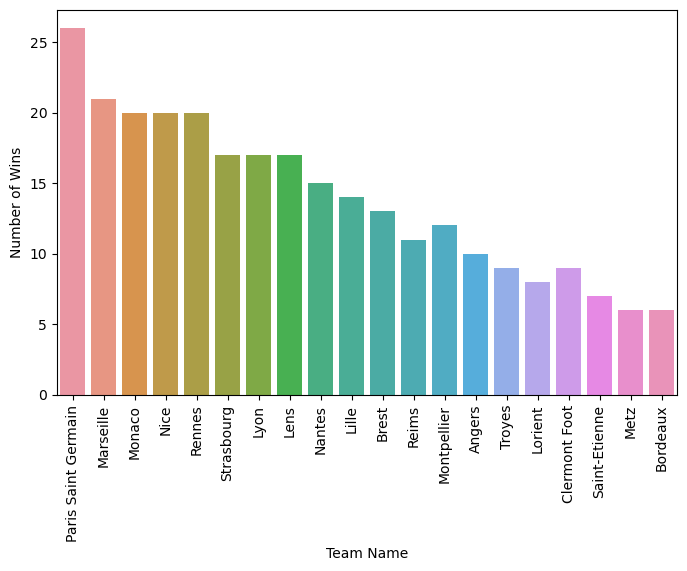

In [114]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Team', y='W', order=df.sort_values('Ranking').Team)

plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.xticks(rotation = 90)
plt.show()

There are two cases where a team with lower ranking achieved more wins tha the next team with higher ranking.

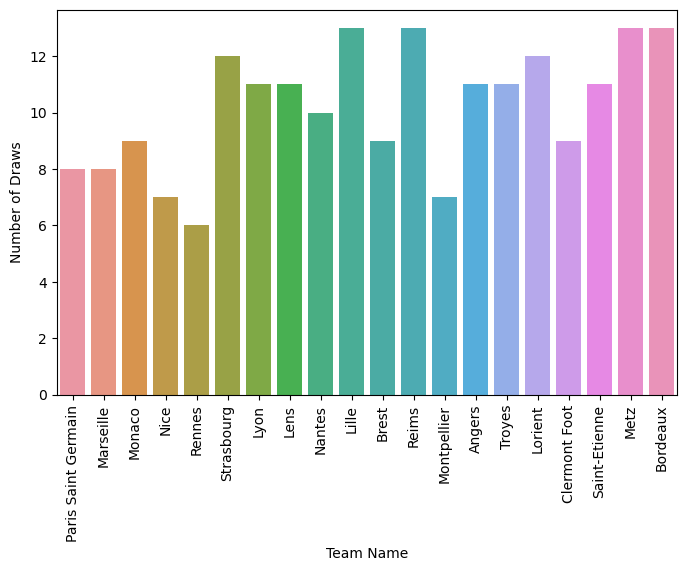

In [113]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Team', y='D', order=df.sort_values('Ranking').Team)

plt.xlabel('Team Name')
plt.ylabel('Number of Draws')

plt.xticks(rotation = 90)
plt.show()

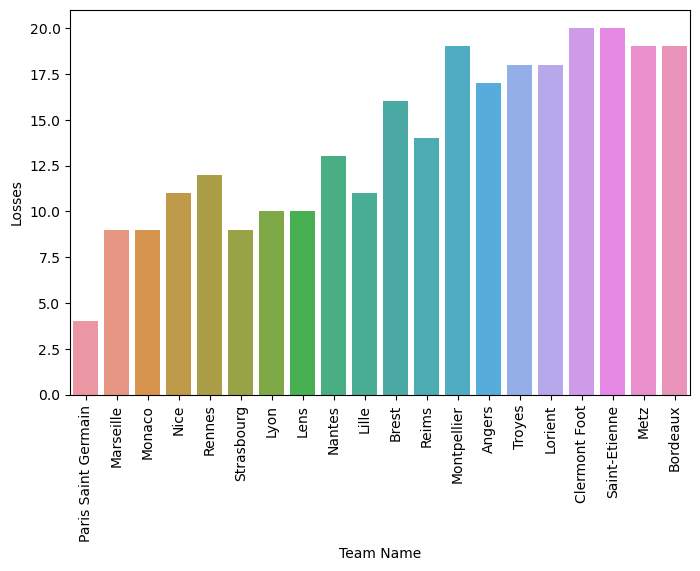

In [112]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Team', y='L', order=df.sort_values('Ranking').Team)

plt.xlabel('Team Name')
plt.ylabel('Number of Losses')

plt.xticks(rotation = 90)
plt.show()

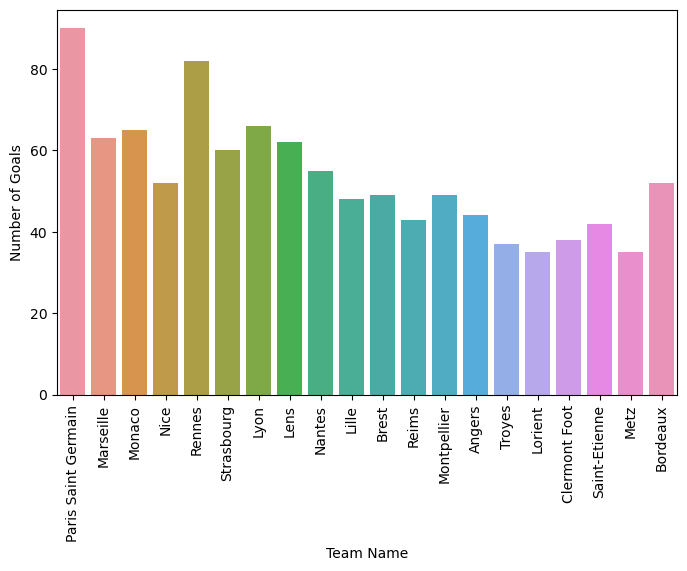

In [115]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Team', y='G', order=df.sort_values('Ranking').Team)

plt.xlabel('Team Name')
plt.ylabel('Number of Goals')

plt.xticks(rotation = 90)
plt.show()

As we can see higher ranking for a team doesn't indicate a higher number of goals.

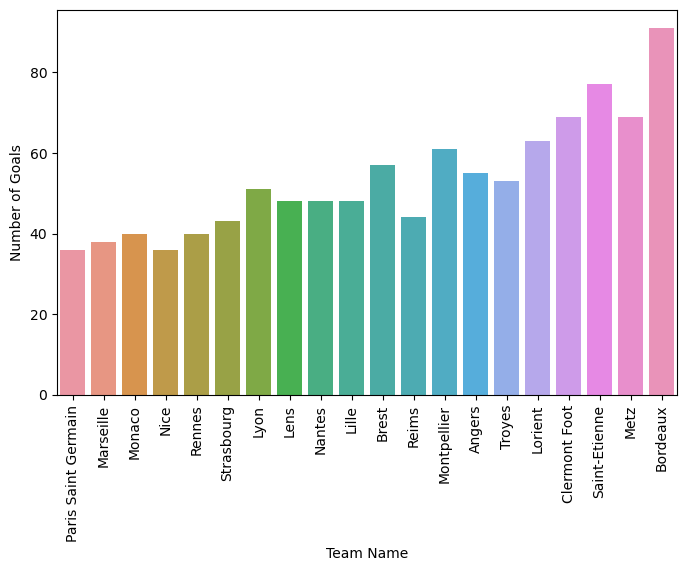

In [116]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Team', y='GA', order=df.sort_values('Ranking').Team)

plt.xlabel('Team Name')
plt.ylabel('Number of Goals')

plt.xticks(rotation = 90)
plt.show()

The worst teams usually concede a high number of goals.

We are going to check if the top 5 teams scored more goals than the expected.

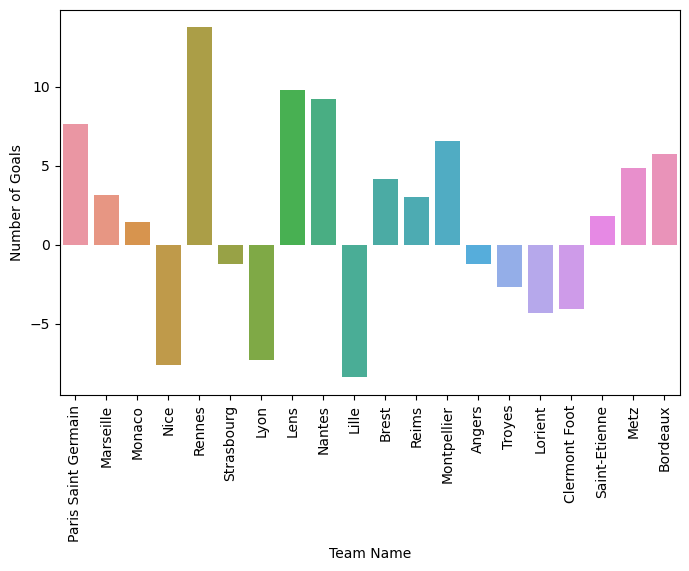

In [123]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Team', y='xG_diff', order=df.sort_values('Ranking').Team)

plt.xlabel('Team Name')
plt.ylabel('Number of Goals')

plt.xticks(rotation = 90)
plt.show()

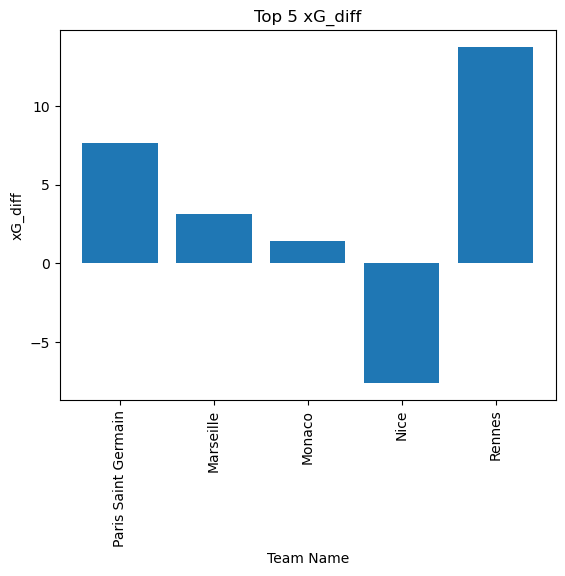

In [127]:
plt.bar(df['Team'].head(5),df['xG_diff'].head(5))

plt.xlabel('Team Name')
plt.ylabel('xG_diff')

plt.xticks(rotation = 90)
plt.title('Top 5 xG_diff')

plt.show()

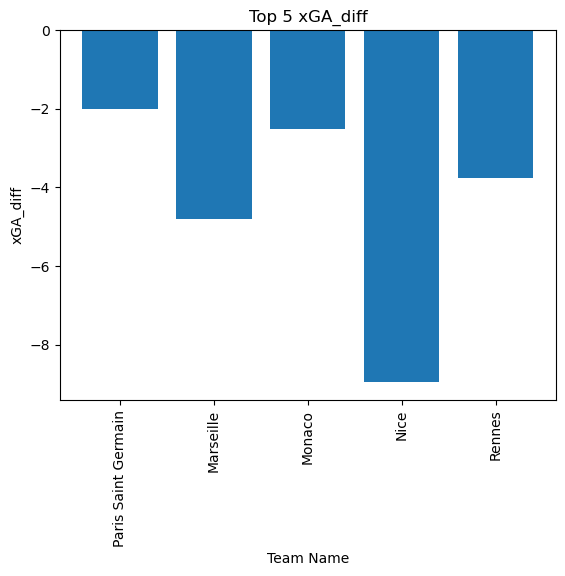

In [128]:
plt.bar(df['Team'].head(5),df['xGA_diff'].head(5))

plt.xlabel('Team Name')
plt.ylabel('xGA_diff')

plt.xticks(rotation = 90)
plt.title('Top 5 xGA_diff')

plt.show()

**All 5 teams conceded less goals than expected**

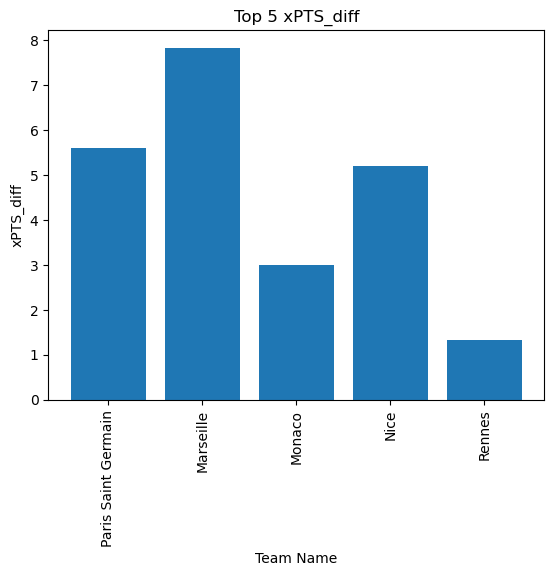

In [129]:
plt.bar(df['Team'].head(5),df['xPTS_diff'].head(5))

plt.xlabel('Team Name')
plt.ylabel('xPTS_diff')

plt.xticks(rotation = 90)
plt.title('Top 5 xPTS_diff')

plt.show()

**All 5 teams earned more points than expected**